In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
ticker = 'AAPL'  # Apple Inc. stock
data = yf.download(ticker, start="2020-01-01", end="2023-01-01", progress=False)

In [ ]:
print(data.head())

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716064  72.776591  71.466805  71.721011  135480400
2020-01-03  72.009125  72.771752  71.783969  71.941336  146322800
2020-01-06  72.582909  72.621646  70.876075  71.127866  118387200
2020-01-07  72.241531  72.849208  72.021215  72.592578  108872000
2020-01-08  73.403641  73.706271  71.943751  71.943751  132079200


In [ ]:
df = data[['Close']]

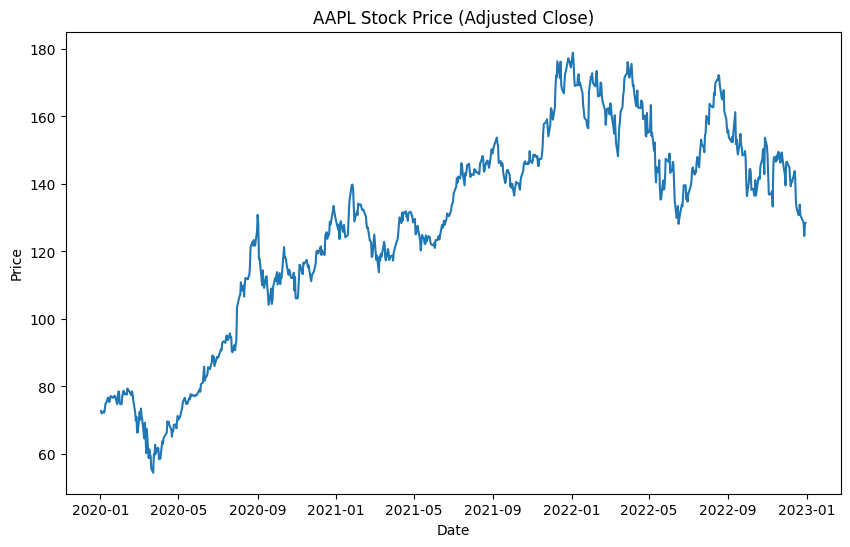

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'])
plt.title(f'{ticker} Stock Price (Adjusted Close)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
def adf_test(time_series):
    result = adfuller(time_series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")

    # Stationarity decision based on p-value
    if result[1] < 0.05:
        print("The time series is likely stationary (reject H0).")
    else:
        print("The time series is likely non-stationary (fail to reject H0).")

In [ ]:
print("ADF test for original data:")
adf_test(df['Close'])

ADF test for original data:
ADF Statistic: -1.888907905709599
p-value: 0.33729703870058736
Critical Values:
	1%: -3.439052522969989
	5%: -2.8653808299915013
	10%: -2.5688152592363274
The time series is likely non-stationary (fail to reject H0).


In [ ]:
df['Differenced'] = df['Close'].diff()

<ipython-input-19-da7b4ac4b00b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Differenced'] = df['Close'].diff()


In [ ]:
df = df.dropna()

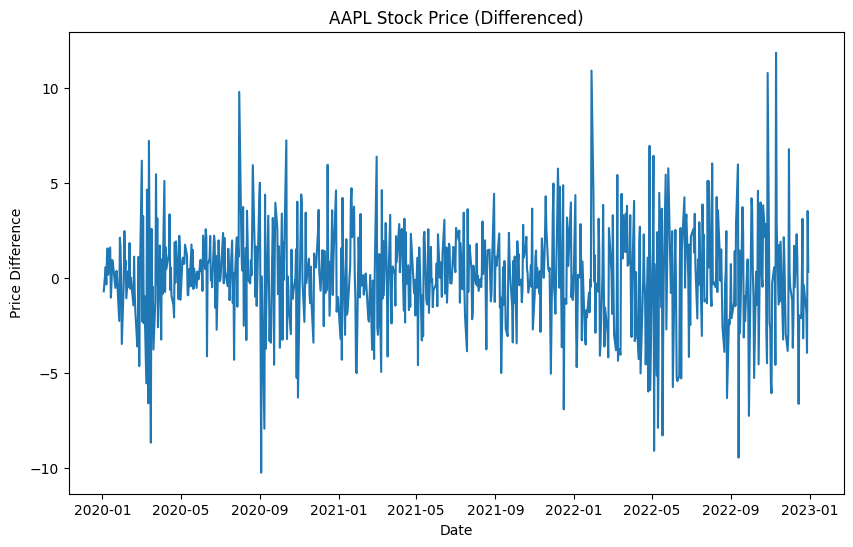

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Differenced'])
plt.title(f'{ticker} Stock Price (Differenced)')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.show()

In [ ]:
print("ADF test for differenced data:")
adf_test(df['Differenced'])

ADF test for differenced data:
ADF Statistic: -29.167877576192257
p-value: 0.0
Critical Values:
	1%: -3.439052522969989
	5%: -2.8653808299915013
	10%: -2.5688152592363274
The time series is likely stationary (reject H0).
